In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def hypothesis(X, w_1,b_1,w_2,b_2): 
    h_1= relu(np.dot(X, w_1)+b_1)  
    h_2 = softmax(np.dot(h_1,w_2)+b_2)
    return h_1,h_2 
  
# function to compute gradient of error function
def gradient(X, y, w_1,b_1,w_2,b_2): 
    h_1,h_2 = hypothesis(X, w_1,b_1,w_2,b_2)
    grad_2 = np.zeros([X.shape[0],10])
    grad_1 = relu_diff(h_1)
    for i in range(X.shape[0]):
        label = np.argmax(y[i])
        grad_2[i] = -1*h_2[i]
        grad_2[i][label] = (1-h_2[i][label])
    grad_update_2 = np.dot(h_1.transpose(), grad_2) 
    grad_b2 = np.sum(grad_2,axis = 0)
    
    tmp = np.dot(w_2,grad_2.transpose())
    grad_1 = grad_1*(tmp.transpose())
    
    grad_update_1 = np.dot(X.transpose(), grad_1)
    grad_b1 = np.sum(grad_1,axis = 0)
    
    return grad_update_1,grad_update_2, grad_b1, grad_b2

  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batchsize): 
    mini_batches = [] 
    n_minibatches = X.shape[0] // batchsize 
    i = 0
  
    for i in range(n_minibatches): 
        X_mini = X[i*batchsize:(i+1)*batchsize] 
        Y_mini = y[i*batchsize:(i+1)*batchsize] 
        mini_batches.append((X_mini, Y_mini)) 
    if X.shape[0] % batchsize != 0: 
        X_mini = X[i*batchsize: X.shape[0]]
        Y_mini = y[i*batchsize: X.shape[0]]
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
def sigmoid(x):
     return 1/(1+np.exp(-x))
    
def softmax(x):
    x = x - np.max(x,axis =1).reshape(-1,1)
    exp_x = np.exp(x)
    softmax_x = exp_x / np.sum(exp_x,axis =1).reshape(-1,1)
    return softmax_x

def relu(x):
    return np.maximum(0,x)

def relu_diff(x):
    x[x>0] =1  
    x[x<=0] =0
    return x 
    
def cross_entropy(y_pred,y_label) :
    loss = 0
    datasize = y_pred.shape[0]
    for q in range(10):
        for j in range(datasize):
            if y_label[j][q] == 1:
                loss += -1*math.log(y_pred[j][q])
    loss = round(loss/datasize,2)
    return loss

def accuracy(y_pred,y_label) :
    datasize = y_pred.shape[0]
    error = 0
    for j in range(datasize):
        if np.argmax(y_pred[j]) != np.argmax(y_label[j]) :
            error += 1
    acc = round(100*(datasize-error)/datasize ,2)
    return acc

def train(x,y_label,w_1,b_1,w_2,b_2,batch_size,valid_split,epoch,lr):
    datasize = x.shape[0]
    learning_curve_train =[]
    learning_curve_valid =[]
    loss_curve_train =[]
    loss_curve_valid =[]
    trainsize = int(datasize*(1-valid_split))
    validsize = int(datasize*valid_split)
    for i in range(epoch):
        if i != 0:
            per = np.random.permutation(x.shape[0])
            x = x[per, :]
            y_label = y_label[per,:]
        print('epoch : ', i+1)
        mini_batches = create_mini_batches(x, y_label, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            grad_1,grad_2,grad_b1,grad_b2 = gradient(X_mini, y_mini, w_1,b_1,w_2,b_2)
            w_1 = w_1 + lr *grad_1
            w_2 = w_2 + lr *grad_2
            b_1 = b_1 + lr *grad_b1
            b_2 = b_2 + lr *grad_b2
            


        y_predict_train = softmax(np.dot(relu(np.dot(x[:trainsize], w_1)+b_1),w_2)+b_2)
        y_predict_valid = softmax(np.dot(relu(np.dot(x[trainsize:], w_1)+b_1),w_2)+b_2)
            
            
        acc_train = accuracy(y_predict_train,y_label[:trainsize])
        acc_valid = accuracy(y_predict_valid,y_label[trainsize:])
        learning_curve_train.append(acc_train)
        learning_curve_valid.append(acc_valid)
        print('accuracy_train : ', acc_train,'%')
        print('accuracy_validation : ', acc_valid,'%')
        loss_train = cross_entropy(y_predict_train,y_label[:trainsize])
        loss_valid = cross_entropy(y_predict_valid,y_label[trainsize:])
        loss_curve_train.append(loss_train)
        loss_curve_valid.append(loss_valid)
        print("loss_train",loss_train)
        print("loss_validation",loss_valid)
        if acc_valid > 98 :                     #stop criterion
            epoch = i
            print(i)
            break
        
    e = list(range(1,epoch+1))
    plt.subplot(121)
    plt.plot(e,learning_curve_train,label='train',color ='b')
    plt.plot(e,learning_curve_valid,label ='validation',color ='r')
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('accuracy', fontsize = 12)
    plt.legend(loc="lower right")
    plt.subplot(122)
    plt.plot(e,loss_curve_train,label ='train',color ='b')
    plt.plot(e,loss_curve_valid,label='validation',color = 'r')
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('loss', fontsize = 12)
    plt.legend(loc="upper right")
    plt.subplots_adjust(wspace =1, hspace =0)
    plt.show()
    
    
    
    return w_1,b_1,w_2,b_2



In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_x = mnist.train.images
train_y = mnist.train.labels
test_x = mnist.test.images
test_y = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


epoch :  1
accuracy_train :  89.48 %
accuracy_validation :  91.15 %
loss_train 0.42
loss_validation 0.33
epoch :  2
accuracy_train :  92.38 %
accuracy_validation :  93.37 %
loss_train 0.29
loss_validation 0.25
epoch :  3
accuracy_train :  92.71 %
accuracy_validation :  93.65 %
loss_train 0.28
loss_validation 0.25
epoch :  4
accuracy_train :  92.94 %
accuracy_validation :  93.75 %
loss_train 0.25
loss_validation 0.23
epoch :  5
accuracy_train :  93.01 %
accuracy_validation :  93.78 %
loss_train 0.26
loss_validation 0.23
epoch :  6
accuracy_train :  93.95 %
accuracy_validation :  94.61 %
loss_train 0.23
loss_validation 0.18
epoch :  7
accuracy_train :  93.66 %
accuracy_validation :  94.29 %
loss_train 0.24
loss_validation 0.2
epoch :  8
accuracy_train :  93.56 %
accuracy_validation :  94.4 %
loss_train 0.24
loss_validation 0.2
epoch :  9
accuracy_train :  93.2 %
accuracy_validation :  93.77 %
loss_train 0.24
loss_validation 0.22
epoch :  10
accuracy_train :  94.38 %
accuracy_validation :

accuracy_train :  95.92 %
accuracy_validation :  96.68 %
loss_train 0.14
loss_validation 0.11
epoch :  80
accuracy_train :  95.69 %
accuracy_validation :  96.29 %
loss_train 0.16
loss_validation 0.13
epoch :  81
accuracy_train :  96.17 %
accuracy_validation :  96.73 %
loss_train 0.14
loss_validation 0.11
epoch :  82
accuracy_train :  94.87 %
accuracy_validation :  95.37 %
loss_train 0.2
loss_validation 0.18
epoch :  83
accuracy_train :  96.03 %
accuracy_validation :  96.52 %
loss_train 0.14
loss_validation 0.12
epoch :  84
accuracy_train :  95.6 %
accuracy_validation :  96.35 %
loss_train 0.16
loss_validation 0.13
epoch :  85
accuracy_train :  96.62 %
accuracy_validation :  97.25 %
loss_train 0.13
loss_validation 0.1
epoch :  86
accuracy_train :  96.33 %
accuracy_validation :  96.64 %
loss_train 0.13
loss_validation 0.11
epoch :  87
accuracy_train :  96.5 %
accuracy_validation :  96.9 %
loss_train 0.13
loss_validation 0.11
epoch :  88
accuracy_train :  95.78 %
accuracy_validation :  96

loss_train 0.16
loss_validation 0.14
epoch :  157
accuracy_train :  96.49 %
accuracy_validation :  97.03 %
loss_train 0.12
loss_validation 0.1
epoch :  158
accuracy_train :  96.1 %
accuracy_validation :  96.83 %
loss_train 0.14
loss_validation 0.12
epoch :  159
accuracy_train :  96.45 %
accuracy_validation :  96.98 %
loss_train 0.13
loss_validation 0.11
epoch :  160
accuracy_train :  96.46 %
accuracy_validation :  97.01 %
loss_train 0.13
loss_validation 0.11
epoch :  161
accuracy_train :  96.12 %
accuracy_validation :  96.67 %
loss_train 0.15
loss_validation 0.13
epoch :  162
accuracy_train :  96.4 %
accuracy_validation :  97.0 %
loss_train 0.12
loss_validation 0.1
epoch :  163
accuracy_train :  96.84 %
accuracy_validation :  96.84 %
loss_train 0.12
loss_validation 0.11
epoch :  164
accuracy_train :  96.3 %
accuracy_validation :  97.1 %
loss_train 0.13
loss_validation 0.1
epoch :  165
accuracy_train :  96.57 %
accuracy_validation :  96.81 %
loss_train 0.13
loss_validation 0.1
epoch :  

loss_train 0.11
loss_validation 0.1
epoch :  234
accuracy_train :  96.83 %
accuracy_validation :  97.48 %
loss_train 0.11
loss_validation 0.08
epoch :  235
accuracy_train :  96.67 %
accuracy_validation :  96.88 %
loss_train 0.13
loss_validation 0.11
epoch :  236
accuracy_train :  95.98 %
accuracy_validation :  96.21 %
loss_train 0.14
loss_validation 0.13
epoch :  237
accuracy_train :  96.86 %
accuracy_validation :  97.39 %
loss_train 0.12
loss_validation 0.09
epoch :  238
accuracy_train :  96.79 %
accuracy_validation :  97.04 %
loss_train 0.11
loss_validation 0.1
epoch :  239
accuracy_train :  96.09 %
accuracy_validation :  96.4 %
loss_train 0.14
loss_validation 0.12
epoch :  240
accuracy_train :  96.4 %
accuracy_validation :  96.95 %
loss_train 0.13
loss_validation 0.11
epoch :  241
accuracy_train :  96.98 %
accuracy_validation :  97.73 %
loss_train 0.11
loss_validation 0.08
epoch :  242
accuracy_train :  96.62 %
accuracy_validation :  97.19 %
loss_train 0.12
loss_validation 0.1
epoch

loss_train 0.13
loss_validation 0.12
epoch :  311
accuracy_train :  96.95 %
accuracy_validation :  97.24 %
loss_train 0.11
loss_validation 0.1
epoch :  312
accuracy_train :  96.75 %
accuracy_validation :  97.01 %
loss_train 0.13
loss_validation 0.11
epoch :  313
accuracy_train :  96.79 %
accuracy_validation :  97.34 %
loss_train 0.13
loss_validation 0.1
epoch :  314
accuracy_train :  97.25 %
accuracy_validation :  97.82 %
loss_train 0.1
loss_validation 0.07
epoch :  315
accuracy_train :  96.63 %
accuracy_validation :  96.99 %
loss_train 0.12
loss_validation 0.11
epoch :  316
accuracy_train :  97.17 %
accuracy_validation :  97.6 %
loss_train 0.1
loss_validation 0.08
epoch :  317
accuracy_train :  95.88 %
accuracy_validation :  96.3 %
loss_train 0.18
loss_validation 0.15
epoch :  318
accuracy_train :  96.7 %
accuracy_validation :  96.86 %
loss_train 0.12
loss_validation 0.1
epoch :  319
accuracy_train :  97.01 %
accuracy_validation :  97.7 %
loss_train 0.1
loss_validation 0.09
epoch :  3

epoch :  388
accuracy_train :  95.97 %
accuracy_validation :  96.57 %
loss_train 0.15
loss_validation 0.12
epoch :  389
accuracy_train :  96.9 %
accuracy_validation :  96.97 %
loss_train 0.12
loss_validation 0.11
epoch :  390
accuracy_train :  96.74 %
accuracy_validation :  97.42 %
loss_train 0.12
loss_validation 0.09
epoch :  391
accuracy_train :  96.78 %
accuracy_validation :  97.48 %
loss_train 0.13
loss_validation 0.09
epoch :  392
accuracy_train :  95.8 %
accuracy_validation :  96.09 %
loss_train 0.2
loss_validation 0.18
epoch :  393
accuracy_train :  97.08 %
accuracy_validation :  97.45 %
loss_train 0.11
loss_validation 0.09
epoch :  394
accuracy_train :  97.24 %
accuracy_validation :  97.79 %
loss_train 0.11
loss_validation 0.09
epoch :  395
accuracy_train :  97.34 %
accuracy_validation :  97.83 %
loss_train 0.09
loss_validation 0.06
epoch :  396
accuracy_train :  97.06 %
accuracy_validation :  97.4 %
loss_train 0.11
loss_validation 0.08
epoch :  397
accuracy_train :  96.6 %
acc

accuracy_train :  96.46 %
accuracy_validation :  97.04 %
loss_train 0.13
loss_validation 0.11
epoch :  466
accuracy_train :  97.0 %
accuracy_validation :  97.55 %
loss_train 0.1
loss_validation 0.08
epoch :  467
accuracy_train :  97.1 %
accuracy_validation :  97.27 %
loss_train 0.1
loss_validation 0.09
epoch :  468
accuracy_train :  96.74 %
accuracy_validation :  97.25 %
loss_train 0.14
loss_validation 0.12
epoch :  469
accuracy_train :  97.08 %
accuracy_validation :  97.35 %
loss_train 0.11
loss_validation 0.09
epoch :  470
accuracy_train :  97.43 %
accuracy_validation :  98.05 %
loss_train 0.09
loss_validation 0.07
epoch :  471
accuracy_train :  96.96 %
accuracy_validation :  97.36 %
loss_train 0.12
loss_validation 0.1
epoch :  472
accuracy_train :  96.55 %
accuracy_validation :  96.81 %
loss_train 0.12
loss_validation 0.11
epoch :  473
accuracy_train :  97.13 %
accuracy_validation :  97.44 %
loss_train 0.1
loss_validation 0.09
epoch :  474
accuracy_train :  96.62 %
accuracy_validati

accuracy_train :  97.29 %
accuracy_validation :  97.64 %
loss_train 0.09
loss_validation 0.08
epoch :  543
accuracy_train :  97.03 %
accuracy_validation :  97.35 %
loss_train 0.11
loss_validation 0.1
epoch :  544
accuracy_train :  97.24 %
accuracy_validation :  97.68 %
loss_train 0.11
loss_validation 0.08
epoch :  545
accuracy_train :  96.74 %
accuracy_validation :  97.2 %
loss_train 0.12
loss_validation 0.11
epoch :  546
accuracy_train :  97.37 %
accuracy_validation :  97.93 %
loss_train 0.09
loss_validation 0.07
epoch :  547
accuracy_train :  96.7 %
accuracy_validation :  97.06 %
loss_train 0.13
loss_validation 0.11
epoch :  548
accuracy_train :  96.93 %
accuracy_validation :  97.24 %
loss_train 0.1
loss_validation 0.09
epoch :  549
accuracy_train :  97.05 %
accuracy_validation :  97.43 %
loss_train 0.11
loss_validation 0.08
epoch :  550
accuracy_train :  97.3 %
accuracy_validation :  97.5 %
loss_train 0.09
loss_validation 0.09
epoch :  551
accuracy_train :  97.01 %
accuracy_validati

accuracy_train :  96.74 %
accuracy_validation :  97.32 %
loss_train 0.13
loss_validation 0.11
epoch :  620
accuracy_train :  97.09 %
accuracy_validation :  97.7 %
loss_train 0.1
loss_validation 0.08
epoch :  621
accuracy_train :  97.14 %
accuracy_validation :  97.57 %
loss_train 0.1
loss_validation 0.08
epoch :  622
accuracy_train :  97.05 %
accuracy_validation :  97.34 %
loss_train 0.11
loss_validation 0.1
epoch :  623
accuracy_train :  97.1 %
accuracy_validation :  97.84 %
loss_train 0.11
loss_validation 0.08
epoch :  624
accuracy_train :  97.22 %
accuracy_validation :  97.62 %
loss_train 0.11
loss_validation 0.09
epoch :  625
accuracy_train :  96.99 %
accuracy_validation :  97.28 %
loss_train 0.11
loss_validation 0.09
epoch :  626
accuracy_train :  96.42 %
accuracy_validation :  96.99 %
loss_train 0.13
loss_validation 0.12
epoch :  627
accuracy_train :  97.12 %
accuracy_validation :  97.49 %
loss_train 0.11
loss_validation 0.09
epoch :  628
accuracy_train :  97.6 %
accuracy_validati

loss_train 0.1
loss_validation 0.07
epoch :  697
accuracy_train :  96.93 %
accuracy_validation :  97.2 %
loss_train 0.11
loss_validation 0.1
epoch :  698
accuracy_train :  97.71 %
accuracy_validation :  97.8 %
loss_train 0.08
loss_validation 0.08
epoch :  699
accuracy_train :  97.33 %
accuracy_validation :  97.9 %
loss_train 0.09
loss_validation 0.08
epoch :  700
accuracy_train :  97.63 %
accuracy_validation :  98.08 %
loss_train 0.08
loss_validation 0.07
epoch :  701
accuracy_train :  97.15 %
accuracy_validation :  97.84 %
loss_train 0.11
loss_validation 0.08
epoch :  702
accuracy_train :  96.75 %
accuracy_validation :  96.97 %
loss_train 0.13
loss_validation 0.11
epoch :  703
accuracy_train :  97.64 %
accuracy_validation :  98.03 %
loss_train 0.09
loss_validation 0.08
epoch :  704
accuracy_train :  97.22 %
accuracy_validation :  97.51 %
loss_train 0.11
loss_validation 0.09
epoch :  705
accuracy_train :  97.46 %
accuracy_validation :  97.66 %
loss_train 0.09
loss_validation 0.08
epoch

loss_train 0.12
loss_validation 0.1
epoch :  774
accuracy_train :  97.01 %
accuracy_validation :  97.34 %
loss_train 0.12
loss_validation 0.1
epoch :  775
accuracy_train :  97.22 %
accuracy_validation :  97.37 %
loss_train 0.1
loss_validation 0.09
epoch :  776
accuracy_train :  96.99 %
accuracy_validation :  97.49 %
loss_train 0.1
loss_validation 0.08
epoch :  777
accuracy_train :  96.97 %
accuracy_validation :  97.35 %
loss_train 0.11
loss_validation 0.09
epoch :  778
accuracy_train :  97.45 %
accuracy_validation :  97.6 %
loss_train 0.09
loss_validation 0.08
epoch :  779
accuracy_train :  97.07 %
accuracy_validation :  97.4 %
loss_train 0.11
loss_validation 0.09
epoch :  780
accuracy_train :  97.29 %
accuracy_validation :  97.87 %
loss_train 0.1
loss_validation 0.07
epoch :  781
accuracy_train :  97.44 %
accuracy_validation :  97.84 %
loss_train 0.09
loss_validation 0.07
epoch :  782
accuracy_train :  97.13 %
accuracy_validation :  97.77 %
loss_train 0.1
loss_validation 0.08
epoch : 

loss_train 0.14
loss_validation 0.11
epoch :  851
accuracy_train :  97.08 %
accuracy_validation :  97.28 %
loss_train 0.12
loss_validation 0.1
epoch :  852
accuracy_train :  97.13 %
accuracy_validation :  97.47 %
loss_train 0.12
loss_validation 0.1
epoch :  853
accuracy_train :  97.03 %
accuracy_validation :  97.53 %
loss_train 0.11
loss_validation 0.1
epoch :  854
accuracy_train :  96.89 %
accuracy_validation :  97.34 %
loss_train 0.14
loss_validation 0.11
epoch :  855
accuracy_train :  97.28 %
accuracy_validation :  97.5 %
loss_train 0.1
loss_validation 0.09
epoch :  856
accuracy_train :  95.91 %
accuracy_validation :  96.24 %
loss_train 0.24
loss_validation 0.2
epoch :  857
accuracy_train :  97.2 %
accuracy_validation :  97.65 %
loss_train 0.1
loss_validation 0.08
epoch :  858
accuracy_train :  97.39 %
accuracy_validation :  97.59 %
loss_train 0.09
loss_validation 0.08
epoch :  859
accuracy_train :  97.46 %
accuracy_validation :  97.82 %
loss_train 0.09
loss_validation 0.08
epoch : 

loss_train 0.09
loss_validation 0.07
epoch :  928
accuracy_train :  97.58 %
accuracy_validation :  97.57 %
loss_train 0.08
loss_validation 0.08
epoch :  929
accuracy_train :  97.05 %
accuracy_validation :  97.35 %
loss_train 0.11
loss_validation 0.1
epoch :  930
accuracy_train :  97.24 %
accuracy_validation :  97.79 %
loss_train 0.11
loss_validation 0.1
epoch :  931
accuracy_train :  97.28 %
accuracy_validation :  97.65 %
loss_train 0.1
loss_validation 0.09
epoch :  932
accuracy_train :  97.12 %
accuracy_validation :  97.7 %
loss_train 0.11
loss_validation 0.08
epoch :  933
accuracy_train :  97.6 %
accuracy_validation :  97.91 %
loss_train 0.08
loss_validation 0.08
epoch :  934
accuracy_train :  97.45 %
accuracy_validation :  97.55 %
loss_train 0.09
loss_validation 0.08
epoch :  935
accuracy_train :  97.39 %
accuracy_validation :  97.66 %
loss_train 0.09
loss_validation 0.08
epoch :  936
accuracy_train :  96.92 %
accuracy_validation :  97.18 %
loss_train 0.12
loss_validation 0.12
epoch

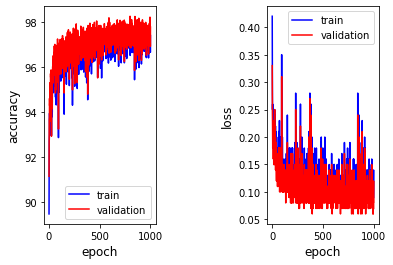

In [3]:
#np.seterr(divide='ignore', invalid='ignore')
#W_1 = np.ones([784,16])
W_1 = np.random.rand(784,16)
b_1 = np.random.rand(1,16)
#W_2 = np.ones([16,10])
W_2 = np.random.rand(16,10)
b_2 = np.random.rand(1,10)



w1_train,b1_train,w2_train,b2_train= train(train_x,train_y,W_1,b_1,W_2,b_2,100,0.2,200,0.01)

In [4]:
y_predict = softmax(np.dot(relu(np.dot(test_x, w1_train)+b1_train),w2_train)+b2_train)
acc = accuracy(y_predict,test_y)

print('accuracy :  ',acc)


accuracy :   91.66
